# Car Details Analysis
This project performs an advanced analysis of a car details dataset. 
It covers data loading, cleaning, exploratory data analysis, and interactive visualizations.

In [38]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Loading and Inspection
We load the dataset and inspect its structure.

In [39]:
# Load the dataset
#df = pd.read_csv('Car details v3.csv')
df = pd.read_csv('C:\\Users\\Lenovo\\OneDrive\\Desktop\\FCDS\\Second Semester\\First Term\\Data Science Methodology\\Assignments\\Car details v3.csv', encoding='ISO-8859-1')

# Display basic dataset information
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())

Dataset Shape: (8128, 13)
Columns: ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Data Cleaning
We check for missing values and duplicates, then handle them appropriately.

In [40]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before cleaning:")
print(missing_values[missing_values > 0])  # Show only columns with missing values

# Remove rows with any missing values
df_clean = df.dropna()

# Remove duplicate records
df_clean = df_clean.drop_duplicates()

# Display new shape after cleaning
print("Shape after removing missing values and duplicates:", df_clean.shape)

# Confirm that all missing values are removed
print("Missing values after cleaning:")
print(df_clean.isnull().sum().sum())  # Should be 0

# Show first 10 cleaned rows
display(df_clean.head(10))

Missing values before cleaning:
mileage      221
engine       221
max_power    215
torque       222
seats        221
dtype: int64
Shape after removing missing values and duplicates: (6717, 13)
Missing values after cleaning:
0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


## Exploratory Data Analysis (EDA)
We generate summary statistics, visualize distributions of numerical variables, 
and create a correlation heatmap to understand relationships within the data.

In [41]:
# Generate summary statistics
display(df_clean.describe())

,year,selling_price,km_driven,seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,5.434271
std,3.897402,5.235504e+05,5.870328e+04,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


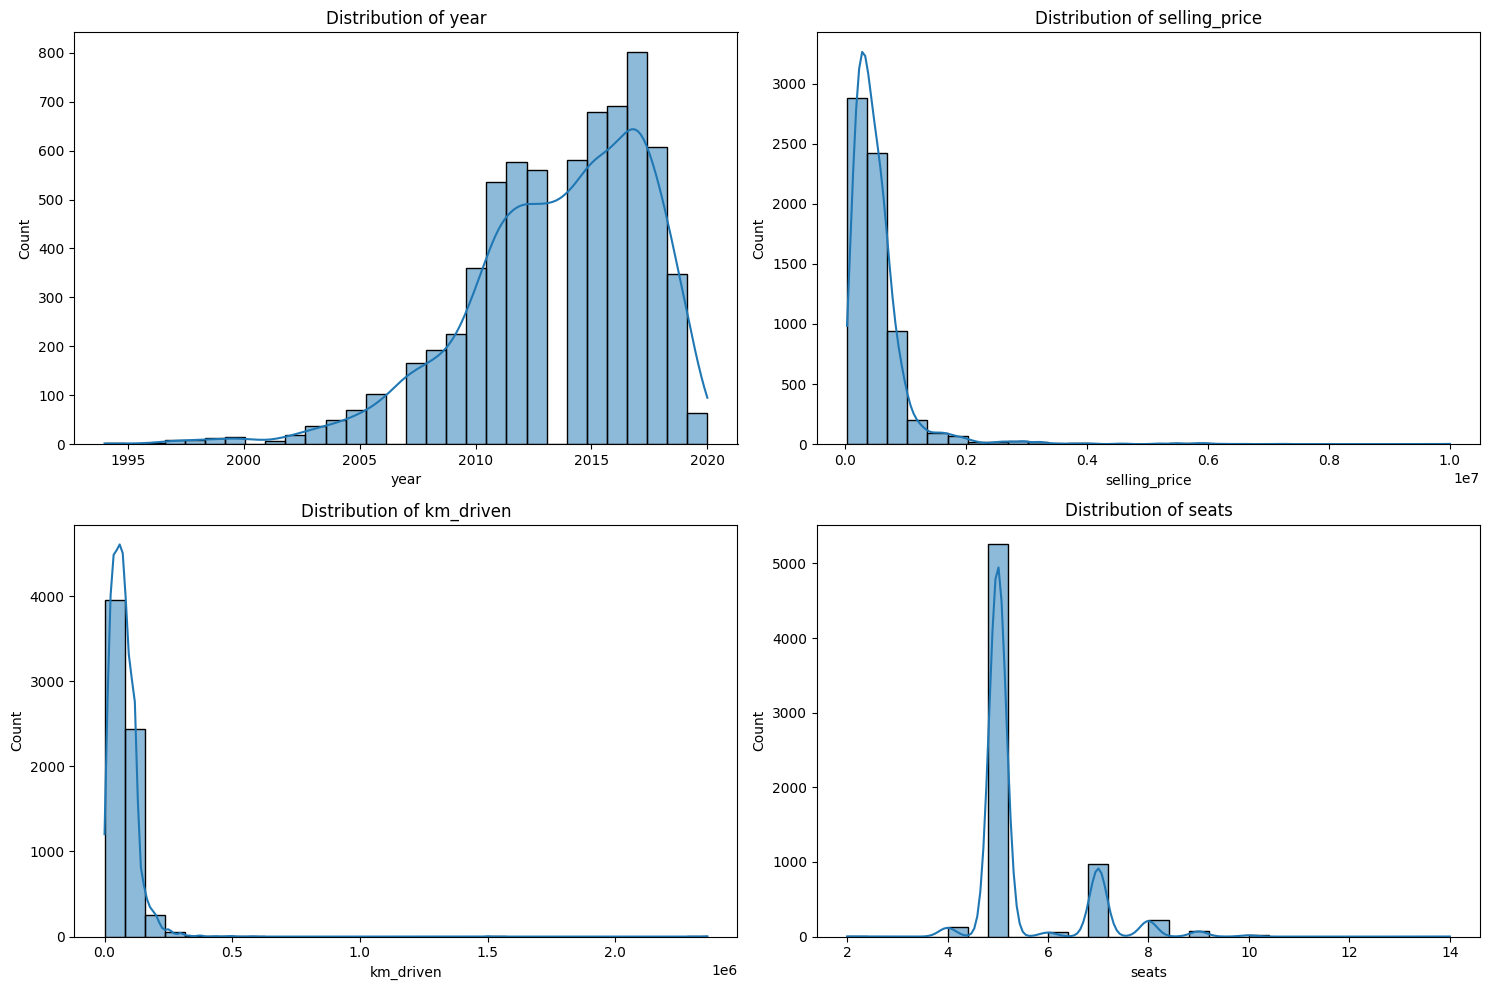

In [42]:
# Visualize distribution of numerical columns
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols) + 1) // 2, 2, i+1)
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

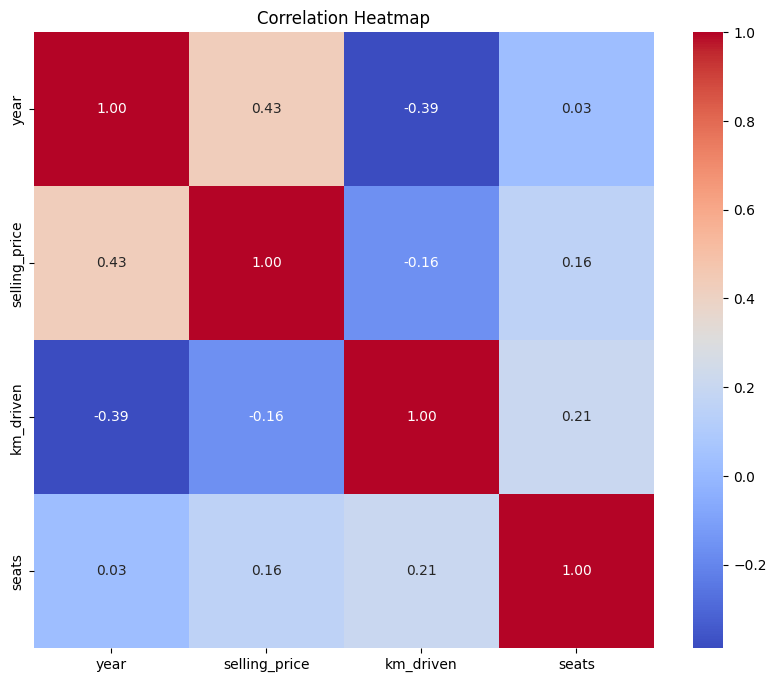

In [43]:
# Plot correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
corr = df_clean[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Interactive Visualizations
We create interactive visualizations using Plotly for dynamic data exploration.

In [44]:
# Scatter Plot: Selling Price vs Kilometers Driven
if 'selling_price' in df_clean.columns and 'km_driven' in df_clean.columns:
    fig = px.scatter(df_clean, x='km_driven', y='selling_price',
                     title="Selling Price vs Kilometers Driven",
                     labels={'km_driven': 'Kilometers Driven', 'selling_price': 'Selling Price'},
                     template='plotly_white')
    fig.show()

In [45]:
# Bar Plot: Average Selling Price by Fuel Type
if 'selling_price' in df_clean.columns and 'fuel' in df_clean.columns:
    fuel_price = df_clean.groupby('fuel')['selling_price'].mean().reset_index()
    fig = px.bar(fuel_price, x='fuel', y='selling_price',
                 title="Average Selling Price by Fuel Type",
                 labels={'fuel': 'Fuel Type', 'selling_price': 'Average Price'},
                 template='plotly_white')
    fig.show()

## Saving Cleaned Data
Export the cleaned dataset for future use.

In [46]:
# Save cleaned dataset to CSV
df_clean.to_csv("cleaned_car_details.csv", index=False)
print("Cleaned dataset saved as 'cleaned_car_details.csv'.")

Cleaned dataset saved as 'cleaned_car_details.csv'.


## Conclusion
- We cleaned the dataset by removing missing values and duplicates.
- We explored key insights through EDA and interactive visualizations.
- We identified correlations between numerical features using a heatmap.
- We analyzed car pricing trends based on mileage and fuel type.
- We created interactive visualizations to better understand the dataset.
- The cleaned dataset is saved for future analysis or modeling.
- These insights can be useful for predicting car prices and understanding key factors affecting resale value.